Set up environment

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Pandas Series Object

In [4]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
print(data)

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64


In [5]:
print(data.values)
print(data.index)

[0.25 0.5  0.75 1.  ]
RangeIndex(start=0, stop=4, step=1)


In [6]:
# Accesing the data by index:
print(data[0], data[1:3], sep='\n')

0.25
1    0.50
2    0.75
dtype: float64


In [7]:
# Setting up index
data = pd.Series([0.25, 0.5, 0.75, 1.0], 
                 index=['a', 'b', 'c', 'd'])
print(data, data['a'], sep='\n')

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64
0.25


In [8]:
# Series from python dict
population_dict = {'California': 3738738,
                   'Texas': 234324,
                   'New York': 354354,
                   'Florida': 24314,
                   'Illoins': 232121}
population = pd.Series(population_dict)
print(population['California'])               # Show value
print(population['California':'Illoins'])     # Slicing like arrays

3738738
California    3738738
Florida         24314
Illoins        232121
dtype: int64


In [8]:
print(pd.Series({2: 'a', 1: 'b', 4: 'c', 3: 'd'}))
print(pd.Series({2: 'a', 1: 'b', 4: 'c', 3: 'd'}, index=[3, 2, 1]))

1    b
2    a
3    d
4    c
dtype: object
3    d
2    a
1    b
dtype: object


In [10]:
area_dict = {'California': 373,
             'Texas': 234,
             'New York': 354,
             'Florida': 243,
             'Illoins': 232}
area = pd.Series(area_dict)

In [10]:
states = pd.DataFrame({'Population': population, 'Area': area})
states

,Area,Population
California,373,3738738
Florida,243,24314
Illoins,232,232121
New York,354,354354
Texas,234,234324


In [12]:
print(states.columns)
print(states.index)
states['Area']      # This shows column called 'Area' and not row! 

Index(['Area', 'Population'], dtype='object')
Index(['California', 'Florida', 'Illoins', 'New York', 'Texas'], dtype='object')


California    373
Florida       243
Illoins       232
New York      354
Texas         234
Name: Area, dtype: int64

In [13]:
# Different ways of constructing Data Frames
# 1)From single Series object
population = pd.Series({'California': 37323,
             'Texas': 23432,
             'New York': 35124,
             'Florida': 24323,
             'Illoins': 23232})
print(pd.DataFrame(population, columns=['Population']))
# 2)From a list of dict
data = [{'a': i, 'b': i+1, 'c': i+2} for i in range(3)]
print(pd.DataFrame(data))
print(pd.DataFrame([{'a': 1, 'b': 2}, 
                   {'a': 1, 'c': 3}, 
                   {'b': 4, 'c': 5}]))
# 3) From dictionary of objects
print(pd.DataFrame({'Population': population}))
# 4) From two-dimensional NumPy array
print(pd.DataFrame(np.random.rand(3, 2),
                   columns=['foo', 'bar'],
                   index=['a', 'b', 'c']))
# 5) From a NumPy structured Array
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
print(pd.DataFrame(A, index=['a', 'b', 'c']))

            Population
California       37323
Florida          24323
Illoins          23232
New York         35124
Texas            23432
   a  b  c
0  0  1  2
1  1  2  3
2  2  3  4
     a    b    c
0  1.0  2.0  NaN
1  1.0  NaN  3.0
2  NaN  4.0  5.0
            Population
California       37323
Florida          24323
Illoins          23232
New York         35124
Texas            23432
        foo       bar
a  0.132957  0.622344
b  0.205267  0.661999
c  0.904217  0.876895
   A    B
a  0  0.0
b  0  0.0
c  0  0.0


In [14]:
# Index object
ind = pd.Index([2, 3, 4, 5, 7, 11])
print(ind[1], ind[::2])         # you can index elements inside Index object
try:
    ind[1] = 2
except TypeError:
    print('Index is immutable')
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])
print('Intersection: ', indA & indB)
print('Union: ', indA | indB)
print('Symmetric difference: ', indA & indB)


3 Int64Index([2, 4, 7], dtype='int64')
Index is immutable
Intersection:  Int64Index([3, 5, 7], dtype='int64')
Union:  Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')
Symmetric difference:  Int64Index([3, 5, 7], dtype='int64')


In [15]:
# Indexing of series
data = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'c', 'd'])
print(data['b'], data['b':'c'], data[1:3], data[(data > 0.5) & (data < 1)],
      'a' in data, data.keys(), sep='\n')
data['a'] = 0.11
data['e'] = 1.11
print(data)

0.5
b    0.50
c    0.75
dtype: float64
b    0.50
c    0.75
dtype: float64
c    0.75
dtype: float64
True
Index(['a', 'b', 'c', 'd'], dtype='object')
a    0.11
b    0.50
c    0.75
d    1.00
e    1.11
dtype: float64


In [16]:
# Indexers
data = pd.Series(['a', 'b', 'c', 'd'], index=[1, 3, 7, 9])
# loc - are using indexers that were assigned to Series
print(data.loc[1], data.loc[1:3], sep='\n')
# iloc - are using indexes default by Python
print(data.iloc[1], data.iloc[1:3], sep='\n')

a
1    a
3    b
dtype: object
b
3    b
7    c
dtype: object


In [17]:
# Data Frame as dictionary
data = pd.DataFrame({'Population': population, 'Area': area})
print(data['Area'], data.Area, sep='\n')
data['Density'] = data['Population'] / data['Area']
data

California    373
Florida       243
Illoins       232
New York      354
Texas         234
Name: Area, dtype: int64
California    373
Florida       243
Illoins       232
New York      354
Texas         234
Name: Area, dtype: int64


,Area,Population,Density
California,373,37323,100.061662
Florida,243,24323,100.094650
Illoins,232,23232,100.137931
New York,354,35124,99.220339
Texas,234,23432,100.136752


In [17]:
data.T

,California,Florida,Illoins,New York,Texas
Area,373.000000,243.00000,232.000000,354.000000,234.000000
Population,37323.000000,24323.00000,23232.000000,35124.000000,23432.000000
Density,100.061662,100.09465,100.137931,99.220339,100.136752


In [19]:
# Explicit indexing
print(data.iloc[:2, :3], data.loc[:'Illoins', :'Population'], sep='\n')


            Area  Population     Density
California   373       37323  100.061662
Florida      243       24323  100.094650
            Area  Population
California   373       37323
Florida      243       24323
Illoins      232       23232


In [20]:
data.loc[data.Density < 100, ['Area']]

,Area
New York,354


In [21]:
data

,Area,Population,Density
California,373,37323,100.061662
Florida,243,24323,100.094650
Illoins,232,23232,100.137931
New York,354,35124,99.220339
Texas,234,23432,100.136752


In [22]:
data.loc['California', 'Population'] = 37399
data.loc['California', ['Population', 'Density']] = [37323, 100.06]
data.loc['California':'New York', 'Area'] = [245, 236, 345, 231]
data.Density = data.Population / data.Area
data['ID'] = [i + 1 for i in range(5)]
data

,Area,Population,Density,ID
California,245,37323,152.338776,1
Florida,236,24323,103.063559,2
Illoins,345,23232,67.339130,3
New York,231,35124,152.051948,4
Texas,234,23432,100.136752,5


In [24]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))
df = pd.DataFrame(rng.randint(0, 10, (3, 4)), 
                  columns=['A', 'B', 'C', 'D'])
np.exp(ser)
np.sin(df * np.pi / 4)

,A,B,C,D
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


In [25]:
area = pd.Series({'Alaska': 12123, 'Texas': 232343, 'Cali': 34532}, name='Area')
population = pd.Series({'Cali': 34123, 'Texas': 34223, 'NewYork': 34211})
population / area

Alaska          NaN
Cali       0.988156
NewYork         NaN
Texas      0.147295
dtype: float64

In [26]:
# Simple example of index matching in those operations
A = pd.Series([1, 2, 3], index=[1, 2, 3])
B = pd.Series([4, 5, 6], index=[0, 2, 4])
A.add(B, fill_value=0)
# same as:
# A = pd.Series([0, 1, 2, 3, 0], index=[0, 1, 2, 3, 4])
# B = pd.Series([4, 0, 5, 0, 6], index=[0, 1, 2, 3, 4])

0    4.0
1    1.0
2    7.0
3    3.0
4    6.0
dtype: float64

In [27]:
# Index alignment in Data Frame
A = pd.DataFrame(rng.randint(0, 10, (2, 2)), columns=list('AB'))
B = pd.DataFrame(rng.randint(0, 10, (4, 4)), columns=list('BCDE'))
print(A, B, A+B, sep='\n')
fill = B.stack().mean()
print(fill)
A.add(B, fill_value=fill)

   A  B
0  1  7
1  5  1
   B  C  D  E
0  4  0  9  5
1  8  0  9  2
2  6  3  8  2
3  4  2  6  4
    A     B   C   D   E
0 NaN  11.0 NaN NaN NaN
1 NaN   9.0 NaN NaN NaN
2 NaN   NaN NaN NaN NaN
3 NaN   NaN NaN NaN NaN
4.5


,A,B,C,D,E
0,5.5,11.0,4.5,13.5,9.5
1,9.5,9.0,4.5,13.5,6.5
2,NaN,10.5,7.5,12.5,6.5
3,NaN,8.5,6.5,10.5,8.5


0  B    2
   C    8
   D    3
   E    0
1  B    3
   C    0
   D    4
   E    3
2  B    7
   C    7
   D    6
   E    2
3  B    0
   C    0
   D    2
   E    5
dtype: int32

In [28]:
df = pd.DataFrame(rng.randint(10, size=(3, 4)), columns=list('QWER'))
print(df - df.iloc[0])
print(df.subtract(df['R'], axis=0))
print(df.subtract(df.iloc[0], axis=1))
df['T'] = (df.R - df.R.mean()) ** 2
df


   Q  W  E  R
0  0  0  0  0
1  0 -5  8  5
2  1 -2  0  0
   Q  W  E  R
0  5  3 -2  0
1  0 -7  1  0
2  6  1 -2  0
   Q  W  E  R
0  0  0  0  0
1  0 -5  8  5
2  1 -2  0  0


,Q,W,E,R,T
0,8,6,1,3,2.777778
1,8,1,9,8,11.111111
2,9,4,1,3,2.777778


MISSING DATA

In [29]:
# Pythonic missing values
vals1 = np.array([1, None, 3, 4])  # none is "object" so whole array will be Python "object" type
                                   # this means that it will calculated using python algoritghms 
                                   # and not optimized NumPy. Also it will show error if you sum it
                                   # with Null values
try:
    sum(vals1)
except TypeError:
    print('None cannot be summed')


In [30]:
# NumPy missing special Value NaN
vals2 = np.array([1, 2, np.nan, 4])

print(vals2, np.sum(vals2), np.nansum(vals2), sep='\n')

In [31]:
vals2 = pd.Series([1, np.nan, 2, None])
np.nansum(vals2)
vals2.sum()

3.0

In [32]:
vals2.isnull()
vals2.notnull()
vals2.dropna()
vals2.fillna(0)
vals2[vals2.notnull()]

0    1.0
2    2.0
dtype: float64

In [33]:
df = pd.DataFrame([[1, np.nan, 3],
                  [5, 3, 4],
                  [np.nan, 4, 3]])
df.dropna()
df.dropna(axis='columns')
df[3] = np.nan
df.dropna(axis='columns', how='all')
df.dropna(axis='rows', thresh=1)

,0,1,2,3
0,1.0,NaN,3,NaN
1,5.0,3.0,4,NaN
2,NaN,4.0,3,NaN


In [34]:
# Filling null values
data = pd.Series([1, np.nan, 2.0, None, 3], index=list('abcde'))
data.fillna(0)                  # fill 0 for nan
data.fillna(method='ffill')     # forward fill
data.fillna(method='bfill')     # backward fill
df.fillna(axis=0, method='ffill')
df.fillna(axis=1, method='ffill')

,0,1,2,3
0,1.0,1.0,3.0,3.0
1,5.0,3.0,4.0,4.0
2,NaN,4.0,3.0,3.0


In [35]:
# Multiply Index Series
index = [('California', 2000),
         ('California', 2001),
         ('Texas', 2000),
         ('Texas', 2001),
         ('New York', 2000),
         ('New York', 2001)]
pop = [3113231,
       3113211,
       3122121,
       3122331,
       31561331,
       31165331]
pop = pd.Series(pop, index=index)
index = pd.MultiIndex.from_tuples(index)
pop = pop.reindex(index)
pop['California']
pop[:, 2001]

California     3113211
Texas          3122331
New York      31165331
dtype: int64

In [36]:
data = pd.DataFrame([[123, 456],
                     [543, 321]],
                    index=['California', 'New York'],
                    columns=[2001, 2002])
data = pd.DataFrame({2001: [123, 543], 2002: [456, 321]}, 
                    index=['California', 'NewYork'])
data = data.stack()
data.unstack()

,2001,2002
California,123,456
NewYork,543,321


In [37]:
# Multiindex as another dimension
pop_df = pd.DataFrame({'Total': pop, 
                       'Under 18': [31200, 31300,
                                    31400, 31500,
                                    31600, 31700]})
f_u18 = pop_df['Under 18'] / pop_df['Total']
f_u18.unstack()

,2000,2001
California,0.010022,0.010054
New York,0.001001,0.001017
Texas,0.010057,0.010089


In [38]:
# Methods of constructing multiindex creation
df = pd.DataFrame(np.random.rand(4, 2),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=['data1', 'data2'])
df

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>data1</th>
      <th>data2</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="2" valign="top">a</th>
      <th>1</th>
      <td>0.856451</td>
      <td>0.129934</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.027052</td>
      <td>0.198406</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">b</th>
      <th>1</th>
      <td>0.636446</td>
      <td>0.546389</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.470844</td>
      <td>0.953022</td>
    </tr>
  </tbody>
</table>
</div>

In [39]:
# Dictionary with a tupples
data = {('California', 2010): [123, 120],
        ('California', 2011): [134, 130],
        ('Texas', 2010): [154, 150],
        ('Texas', 2011): [174, 170]}

data = pd.DataFrame(data, index=['Po1', 'Po2']).unstack()
data.index.names = ['State', 'Year', 'Pos']
data

State       Year  Pos
California  2010  Po1    123
                  Po2    120
            2011  Po1    134
                  Po2    130
Texas       2010  Po1    154
                  Po2    150
            2011  Po1    174
                  Po2    170
dtype: int64

In [41]:
# Multiindex example
index = pd.MultiIndex.from_product([[2012, 2013], [1, 2]], 
                                   names=['Year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guide', 'Sue'], ['HR', 'Temp']], 
                                     names=['subject', 'Type'])
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead tr th {
        text-align: left;
    }

    .dataframe thead tr:last-of-type th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th>subject</th>
      <th colspan="2" halign="left">Bob</th>
      <th colspan="2" halign="left">Guide</th>
      <th colspan="2" halign="left">Sue</th>
    </tr>
    <tr>
      <th></th>
      <th>Type</th>
      <th>HR</th>
      <th>Temp</th>
      <th>HR</th>
      <th>Temp</th>
      <th>HR</th>
      <th>Temp</th>
    </tr>
    <tr>
      <th>Year</th>
      <th>visit</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="2" valign="top">2012</th>
      <th>1</th>
      <td>31.0</td>
      <td>36.8</td>
      <td>52.0</td>
      <td>38.5</td>
      <td>36.0</td>
      <td>38.1</td>
    </tr>
    <tr>
      <th>2</th>
      <td>36.0</td>
      <td>33.8</td>
      <td>28.0</td>
      <td>39.0</td>
      <td>36.0</td>
      <td>36.5</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">2013</th>
      <th>1</th>
      <td>33.0</td>
      <td>37.0</td>
      <td>47.0</td>
      <td>37.8</td>
      <td>41.0</td>
      <td>36.8</td>
    </tr>
    <tr>
      <th>2</th>
      <td>39.0</td>
      <td>36.5</td>
      <td>29.0</td>
      <td>36.1</td>
      <td>39.0</td>
      <td>38.5</td>
    </tr>
  </tbody>
</table>
</div>

In [42]:
health_data.loc[:, pd.IndexSlice[:, 'HR']]

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead tr th {
        text-align: left;
    }

    .dataframe thead tr:last-of-type th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th>subject</th>
      <th>Bob</th>
      <th>Guide</th>
      <th>Sue</th>
    </tr>
    <tr>
      <th></th>
      <th>Type</th>
      <th>HR</th>
      <th>HR</th>
      <th>HR</th>
    </tr>
    <tr>
      <th>Year</th>
      <th>visit</th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="2" valign="top">2012</th>
      <th>1</th>
      <td>31.0</td>
      <td>52.0</td>
      <td>36.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>36.0</td>
      <td>28.0</td>
      <td>36.0</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">2013</th>
      <th>1</th>
      <td>33.0</td>
      <td>47.0</td>
      <td>41.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>39.0</td>
      <td>29.0</td>
      <td>39.0</td>
    </tr>
  </tbody>
</table>
</div>

In [43]:
index = pd.MultiIndex.from_product([['A', 'B'], ['a', 'b'], [1, 2]])
columns = pd.MultiIndex.from_product([['X', 'Y'], [1, 2, 3]])
data = np.random.randint(0, 100, (8, 6))
df = pd.DataFrame(data, 
                  index=index,
                  columns=columns)
df.index.names = ['1:', '2:', '3:']
df.columns.names = ['1:', '2:']
df

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead tr th {
        text-align: left;
    }

    .dataframe thead tr:last-of-type th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th></th>
      <th>1:</th>
      <th colspan="3" halign="left">X</th>
      <th colspan="3" halign="left">Y</th>
    </tr>
    <tr>
      <th></th>
      <th></th>
      <th>2:</th>
      <th>1</th>
      <th>2</th>
      <th>3</th>
      <th>1</th>
      <th>2</th>
      <th>3</th>
    </tr>
    <tr>
      <th>1:</th>
      <th>2:</th>
      <th>3:</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="4" valign="top">A</th>
      <th rowspan="2" valign="top">a</th>
      <th>1</th>
      <td>11</td>
      <td>17</td>
      <td>74</td>
      <td>95</td>
      <td>33</td>
      <td>86</td>
    </tr>
    <tr>
      <th>2</th>
      <td>73</td>
      <td>23</td>
      <td>85</td>
      <td>7</td>
      <td>47</td>
      <td>67</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">b</th>
      <th>1</th>
      <td>41</td>
      <td>95</td>
      <td>89</td>
      <td>28</td>
      <td>42</td>
      <td>74</td>
    </tr>
    <tr>
      <th>2</th>
      <td>84</td>
      <td>50</td>
      <td>71</td>
      <td>69</td>
      <td>87</td>
      <td>36</td>
    </tr>
    <tr>
      <th rowspan="4" valign="top">B</th>
      <th rowspan="2" valign="top">a</th>
      <th>1</th>
      <td>39</td>
      <td>8</td>
      <td>98</td>
      <td>44</td>
      <td>41</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>26</td>
      <td>27</td>
      <td>63</td>
      <td>68</td>
      <td>68</td>
      <td>62</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">b</th>
      <th>1</th>
      <td>60</td>
      <td>36</td>
      <td>47</td>
      <td>55</td>
      <td>50</td>
      <td>69</td>
    </tr>
    <tr>
      <th>2</th>
      <td>29</td>
      <td>53</td>
      <td>56</td>
      <td>36</td>
      <td>58</td>
      <td>80</td>
    </tr>
  </tbody>
</table>
</div>

In [44]:
# Access X data frame
df.X                    # X column
df.X[2]                 # X column and '2' subcolumn
df['X', 2]              # same result
df.loc['A', 'X']        # Rows A, column X
df.loc['A', ('X', 1)]   # Rows A, column X but only 1
df.loc[('A', 'a', 1), :]        # Only first Row (will be transalted to column
df.loc[('A', 'a'), ('X', 1)]    # Only 1:2 from A/a and X1
df.loc[pd.IndexSlice[:,'a', 1], pd.IndexSlice[:, 1]]

,,1:,X,Y
,,2:,1,1
1:,2:,3:,,
A,a,1,11,95
B,a,1,39,44


In [45]:
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]], names=['char', 'int'])
df = pd.Series(np.random.randint(0, 10, 6), index=index)
# because indexes are not sort, we cannot slice it, so:
df = df.sort_index()
try:
    df['a': 'b']
except KeyError:
    df = df.sort_index()

df['a':'b']


char  int
a     1      2
      2      9
b     1      0
      2      1
dtype: int32

In [45]:
# Unstacking and stacking
index = pd.MultiIndex.from_product([['A', 'B'], ['a', 'b']])
data = pd.Series(np.random.rand(4), index=index)
data.unstack(level=0)       # First index on top
data.unstack(level=1)       # Second index on top

,a,b
A,0.804855,0.814077
B,0.013387,0.009197


In [46]:
pop_flat = pd.DataFrame([['California', 2000, 1], 
                         ['California', 2001, 2], 
                         ['New York', 2000, 3],
                         ['New York', 2001, 4],
                         ['Texas', 2000, 5],
                         ['Texas', 2001, 5]], 
                        columns=['state', 'year', 'population'])
pop_flat.set_index(['state', 'year'])

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>population</th>
    </tr>
    <tr>
      <th>state</th>
      <th>year</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="2" valign="top">California</th>
      <th>2000</th>
      <td>1</td>
    </tr>
    <tr>
      <th>2001</th>
      <td>2</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">New York</th>
      <th>2000</th>
      <td>3</td>
    </tr>
    <tr>
      <th>2001</th>
      <td>4</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">Texas</th>
      <th>2000</th>
      <td>5</td>
    </tr>
    <tr>
      <th>2001</th>
      <td>5</td>
    </tr>
  </tbody>
</table>
</div>

In [48]:
# Simple summary statistics
health_data.mean(level='Year')
health_data.mean(level='visit')
health_data['Bob'].mean(axis=0, level='Year') 
#health_data.mean(axis=1)

Type,HR,Temp
Year,,
2012,33.5,35.30
2013,36.0,36.75


In [49]:
# Usefl func for building df of spec size:
def make_df(col, ind):
    data = {c: [str(c) + str(i) for i in ind] for c in col}
    return pd.DataFrame(data, ind)
df1 = make_df('ABC', range(10))
df2 = make_df('ABC', range(11, 21))
pd.concat([df1, df2], axis=0)   # Add below (to columns)
pd.concat([df1, df2], axis=1)   # Add right, but we have wrong indexing, so:
df2['newIndex'] = range(10)
df2 = df2.set_index('newIndex')
pd.concat([df1, df2], axis=1)   
# different way
df2 = make_df('ABC', range(11, 21))
pd.concat([df1, df2], axis=1, ignore_index=True)       # it doesnt work

,0,1,2,3,4,5
0,A0,B0,C0,NaN,NaN,NaN
1,A1,B1,C1,NaN,NaN,NaN
2,A2,B2,C2,NaN,NaN,NaN
3,A3,B3,C3,NaN,NaN,NaN
4,A4,B4,C4,NaN,NaN,NaN
5,A5,B5,C5,NaN,NaN,NaN
6,A6,B6,C6,NaN,NaN,NaN
7,A7,B7,C7,NaN,NaN,NaN
8,A8,B8,C8,NaN,NaN,NaN
9,A9,B9,C9,NaN,NaN,NaN


In [50]:
# Recall: Concatenation of Numpy Arrays
x, y, z = [1, 2, 3], [4, 5, 6], [7, 8, 9]
np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [51]:
#Concatenation with pd.concat
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [52]:
pd1 = make_df('AB', [1, 2])
pd2 = make_df('AB', [3, 4])
pd1, pd2
pd.concat([pd1, pd2])
pd1 = make_df('AB', [1, 2])
pd2 = make_df('CD', [1, 2])
pd.concat([pd1, pd2], axis=1)

,A,B,C,D
1,A1,B1,C1,D1
2,A2,B2,C2,D2


In [53]:
# Concatonations is multiplying indeces:
pd1 = make_df('AB', [0, 1, 2, 3])
pd2 = make_df('AB', [0, 1])
pd.concat([pd1, pd2])

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3
0,A0,B0
1,A1,B1


In [54]:
# Solution1: Catching the error
try:
    pd.concat([pd1, pd2], verify_integrity=True)
except ValueError as e:
    print('Value Error: ', e)

In [55]:
# Solution2: Ignore the overlaping index
pd.concat([pd1, pd2], ignore_index=True)

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3
4,A0,B0
5,A1,B1


In [56]:
# Adding multiple Index
pd.concat([pd1, pd2], keys=['x', 'y'])

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>A</th>
      <th>B</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="4" valign="top">x</th>
      <th>0</th>
      <td>A0</td>
      <td>B0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>A1</td>
      <td>B1</td>
    </tr>
    <tr>
      <th>2</th>
      <td>A2</td>
      <td>B2</td>
    </tr>
    <tr>
      <th>3</th>
      <td>A3</td>
      <td>B3</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">y</th>
      <th>0</th>
      <td>A0</td>
      <td>B0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>A1</td>
      <td>B1</td>
    </tr>
  </tbody>
</table>
</div>

In [58]:
pd1 = make_df('ABC', [1, 2])
pd2 = make_df('BCD', [3, 4])
print(pd.concat([pd1, pd2]))
print(pd.concat([pd1, pd2], join='inner'))
print(pd.concat([pd1, pd2], join='outer'))
print(pd.concat([pd1, pd2], join_axes=[df1.columns]))
print(pd.concat([pd1, pd2], join_axes=[pd2.columns]))

     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4
    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4
     A   B   C
1   A1  B1  C1
2   A2  B2  C2
3  NaN  B3  C3
4  NaN  B4  C4
    B   C    D
1  B1  C1  NaN
2  B2  C2  NaN
3  B3  C3   D3
4  B4  C4   D4


In [59]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hite_date': [2004, 2008, 2012, 2014]})
df3 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting', 'Engineering', 'Engineering',
                              'HR', 'HR'],
                    'skills': ['math', 'spreadsheet', 'coding', 'linux',
                               'spreadsheet', 'organisation']})
df6 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [1000, 2000, 3000, 4000]})

In [60]:
df4 = pd.merge(df1, df2)
df4

,employee,group,hite_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [61]:
pd.merge(df4, df3)

,employee,group,hite_date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2014,Steve


In [62]:
pd.merge(df1, df5)

,employee,group,skills
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheet
2,Jake,Engineering,coding
3,Jake,Engineering,linux
4,Lisa,Engineering,coding
5,Lisa,Engineering,linux
6,Sue,HR,spreadsheet
7,Sue,HR,organisation


In [63]:
# specify on which column to merge
pd.merge(df1, df2, on='employee')

,employee,group,hite_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [64]:
pd.merge(df1, df6, left_on='employee', right_on='name').drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,1000
1,Jake,Engineering,2000
2,Lisa,Engineering,3000
3,Sue,HR,4000


In [65]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
pd.merge(df1a, df2a, left_index=True, right_index=True)
df1a.join(df2a)

,group,hite_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


In [66]:
df7 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df8 = pd.DataFrame({'name': ['Mary', 'Jospeh'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])
pd.merge(df7, df8, how='inner')
pd.merge(df7, df8, how='outer')
pd.merge(df7, df8, how='left')
pd.merge(df7, df8, how='right')

,name,food,drink
0,Mary,bread,wine
1,Jospeh,NaN,beer


In [67]:
df9 = pd.DataFrame({'name': ['Lisa', 'Sue', 'David'],
                    'rank': [1, 2, 3]})
df10 = pd.DataFrame({'name': ['Lisa', 'David', 'Sue'],
                     'rank': [3, 1, 2]})
pd.merge(df9, df10, on='name', suffixes=['_L', '_R'])

,name,rank_L,rank_R
0,Lisa,1,3
1,Sue,2,2
2,David,3,1


In [68]:
dir = 'C:\\Users\\Lenovo\\PycharmProjects\\RandomPythonProjects\\Project9_PythonDataScienceHandbook_VanderPlas\\data\\'
pop = pd.read_csv(dir + 'state-population.csv')
areas = pd.read_csv(dir + 'state-areas.csv')
abbrevs = pd.read_csv(dir + 'state-abbrevs.csv')

In [69]:
abbrevs.head()

,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [70]:
# Give names instead of abbriviations
merged = pd.merge(pop,abbrevs, how='outer', 
                  left_on='state/region', right_on='abbreviation').drop('abbreviation', axis=1)
merged.head()

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


In [71]:
# Test the merged table
merged.isnull().any()


state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

In [72]:
# Firstly we want to explore why population has nulls
merged[merged['population'].isnull()].head()
# it means that prior to 2000 Puerto Rico doesnt have  data

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


In [73]:
# Also whu State has empty rows. So we check what abbr are in empty rows
merged.loc[merged['state'].isnull(), 'state/region'].unique()
# It turns out that some rows doesnt have state for US and PR

array(['PR', 'USA'], dtype=object)

In [74]:
# So we want to add USA and Puerto Rico as state for those abbr
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'Puerto Rico'
# Check if they are no tnull anymore
merged.isnull().any()
# this problem solved

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [75]:
# now we want to merge with Areas table
final = pd.merge(merged, areas, on='state', how='left')
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423
1,AL,total,2012,4817528.0,Alabama,52423
2,AL,under18,2010,1130966.0,Alabama,52423
3,AL,total,2010,4785570.0,Alabama,52423
4,AL,under18,2011,1125763.0,Alabama,52423


In [76]:
# check for nulls
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)    False
dtype: bool

In [77]:
# if there were nulls I could check them using:
final['state'][final['area (sq. mi)'].isnull()].unique()
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423
1,AL,total,2012,4817528.0,Alabama,52423
2,AL,under18,2010,1130966.0,Alabama,52423
3,AL,total,2010,4785570.0,Alabama,52423
4,AL,under18,2011,1125763.0,Alabama,52423


In [78]:
# Select only 2010 year
data2010 = final.loc[final.ages == 'total']
data2010 = data2010.loc[data2010.year == 2010]
data2010.set_index('state', inplace=True)
density = data2010['population'] / data2010['area (sq. mi)']
density.sort_values(ascending=False, inplace=True)
density.tail()

state
South Dakota    10.583512
North Dakota     9.537565
Montana          6.736171
Wyoming          5.768079
Alaska           1.087509
dtype: float64

In [84]:
# Planets data
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [85]:
# Glimp into data
planets.head()
# Show all results
planets.dropna().describe()


,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


In [86]:
# grouping by
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df.groupby('key').mean()

,data
key,
A,1.5
B,2.5
C,3.5


In [87]:
# If we want to see the minimum Age each of the method was used to discover planets:
min_age = planets.groupby('method')['year'].min()
min_age.sort_values(ascending=True, inplace=True)
min_age

method
Radial Velocity                  1989
Pulsar Timing                    1992
Transit                          2002
Imaging                          2004
Microlensing                     2004
Pulsation Timing Variations      2007
Eclipse Timing Variations        2008
Astrometry                       2010
Orbital Brightness Modulation    2011
Transit Timing Variations        2011
Name: year, dtype: int64

In [88]:
# if we want to see which 2 methods are the most used:
countplanets = planets.groupby('method')['year'].count()
countplanets.sort_values(ascending=False, inplace=True)
countplanets.iloc[0:2]

method
Radial Velocity    553
Transit            397
Name: year, dtype: int64

In [89]:
# Additional functionality
# Aggregate, filter, transform, apply
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                  columns=['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [90]:
# Agreggate for each column
df.groupby('key').aggregate(['min', np.median, max])

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead tr th {
        text-align: left;
    }

    .dataframe thead tr:last-of-type th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th colspan="3" halign="left">data1</th>
      <th colspan="3" halign="left">data2</th>
    </tr>
    <tr>
      <th></th>
      <th>min</th>
      <th>median</th>
      <th>max</th>
      <th>min</th>
      <th>median</th>
      <th>max</th>
    </tr>
    <tr>
      <th>key</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>A</th>
      <td>0</td>
      <td>1.5</td>
      <td>3</td>
      <td>3</td>
      <td>4.0</td>
      <td>5</td>
    </tr>
    <tr>
      <th>B</th>
      <td>1</td>
      <td>2.5</td>
      <td>4</td>
      <td>0</td>
      <td>3.5</td>
      <td>7</td>
    </tr>
    <tr>
      <th>C</th>
      <td>2</td>
      <td>3.5</td>
      <td>5</td>
      <td>3</td>
      <td>6.0</td>
      <td>9</td>
    </tr>
  </tbody>
</table>
</div>

In [91]:
# Aggregate for specific column and method
df.groupby('key').aggregate({'data1': min,
                             'data2': max})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


In [92]:
def filter_func(x):
    return x['data2'].std() > 4

df.groupby('key').filter(filter_func)

,key,data1,data2
1,B,1,0
2,C,2,3
4,B,4,7
5,C,5,9


In [93]:
# Transformation 
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


In [94]:
# Apply method
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum()
    return x

df.groupby('key').apply(norm_by_data2)


,key,data1,data2
0,A,0.000000,5
1,B,0.142857,0
2,C,0.166667,3
3,A,0.375000,3
4,B,0.571429,7
5,C,0.416667,9


In [95]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


In [96]:
# import dataset for those examples
titanic = sns.load_dataset('titanic')

In [97]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [98]:
titanic.groupby(['sex', 'class'])[['survived']].aggregate('mean').unstack()

titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [99]:
# Add 3 dimension from mask
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', index=['sex', age], columns='class')

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>class</th>
      <th>First</th>
      <th>Second</th>
      <th>Third</th>
    </tr>
    <tr>
      <th>sex</th>
      <th>age</th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="2" valign="top">female</th>
      <th>(0, 18]</th>
      <td>0.909091</td>
      <td>1.000000</td>
      <td>0.511628</td>
    </tr>
    <tr>
      <th>(18, 80]</th>
      <td>0.972973</td>
      <td>0.900000</td>
      <td>0.423729</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">male</th>
      <th>(0, 18]</th>
      <td>0.800000</td>
      <td>0.600000</td>
      <td>0.215686</td>
    </tr>
    <tr>
      <th>(18, 80]</th>
      <td>0.375000</td>
      <td>0.071429</td>
      <td>0.133663</td>
    </tr>
  </tbody>
</table>
</div>

In [100]:
# Add 3 dimension to oclumns
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', index=['sex', age], columns=[fare, 'class'])

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead tr th {
        text-align: left;
    }

    .dataframe thead tr:last-of-type th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th>fare</th>
      <th colspan="3" halign="left">(-0.001, 14.454]</th>
      <th colspan="3" halign="left">(14.454, 512.329]</th>
    </tr>
    <tr>
      <th></th>
      <th>class</th>
      <th>First</th>
      <th>Second</th>
      <th>Third</th>
      <th>First</th>
      <th>Second</th>
      <th>Third</th>
    </tr>
    <tr>
      <th>sex</th>
      <th>age</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="2" valign="top">female</th>
      <th>(0, 18]</th>
      <td>NaN</td>
      <td>1.000000</td>
      <td>0.714286</td>
      <td>0.909091</td>
      <td>1.000000</td>
      <td>0.318182</td>
    </tr>
    <tr>
      <th>(18, 80]</th>
      <td>NaN</td>
      <td>0.880000</td>
      <td>0.444444</td>
      <td>0.972973</td>
      <td>0.914286</td>
      <td>0.391304</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">male</th>
      <th>(0, 18]</th>
      <td>NaN</td>
      <td>0.000000</td>
      <td>0.260870</td>
      <td>0.800000</td>
      <td>0.818182</td>
      <td>0.178571</td>
    </tr>
    <tr>
      <th>(18, 80]</th>
      <td>0.0</td>
      <td>0.098039</td>
      <td>0.125000</td>
      <td>0.391304</td>
      <td>0.030303</td>
      <td>0.192308</td>
    </tr>
  </tbody>
</table>
</div>

In [101]:
# Different aggregations method
titanic.pivot_table('survived', index=['sex', age], columns='class', aggfunc='sum')

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>class</th>
      <th>First</th>
      <th>Second</th>
      <th>Third</th>
    </tr>
    <tr>
      <th>sex</th>
      <th>age</th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="2" valign="top">female</th>
      <th>(0, 18]</th>
      <td>10</td>
      <td>14</td>
      <td>22</td>
    </tr>
    <tr>
      <th>(18, 80]</th>
      <td>72</td>
      <td>54</td>
      <td>25</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">male</th>
      <th>(0, 18]</th>
      <td>4</td>
      <td>9</td>
      <td>11</td>
    </tr>
    <tr>
      <th>(18, 80]</th>
      <td>36</td>
      <td>6</td>
      <td>27</td>
    </tr>
  </tbody>
</table>
</div>

In [102]:
# More complicated example:
titanic.pivot_table(index=['sex', age], columns='class', 
                    aggfunc={'survived': 'sum', 'fare': 'mean'})

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead tr th {
        text-align: left;
    }

    .dataframe thead tr:last-of-type th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th></th>
      <th colspan="3" halign="left">fare</th>
      <th colspan="3" halign="left">survived</th>
    </tr>
    <tr>
      <th></th>
      <th>class</th>
      <th>First</th>
      <th>Second</th>
      <th>Third</th>
      <th>First</th>
      <th>Second</th>
      <th>Third</th>
    </tr>
    <tr>
      <th>sex</th>
      <th>age</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="2" valign="top">female</th>
      <th>(0, 18]</th>
      <td>127.474245</td>
      <td>25.064286</td>
      <td>17.370835</td>
      <td>10</td>
      <td>14</td>
      <td>22</td>
    </tr>
    <tr>
      <th>(18, 80]</th>
      <td>105.043469</td>
      <td>21.224653</td>
      <td>14.785453</td>
      <td>72</td>
      <td>54</td>
      <td>25</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">male</th>
      <th>(0, 18]</th>
      <td>114.638320</td>
      <td>26.116947</td>
      <td>20.639055</td>
      <td>4</td>
      <td>9</td>
      <td>11</td>
    </tr>
    <tr>
      <th>(18, 80]</th>
      <td>68.877389</td>
      <td>20.219593</td>
      <td>10.022624</td>
      <td>36</td>
      <td>6</td>
      <td>27</td>
    </tr>
  </tbody>
</table>
</div>

In [103]:
# Add Total at end:
titanic.pivot_table('survived', index='sex', columns='class', 
                    margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


In [104]:
# Example with birthrate data
births = pd.read_csv(dir + 'births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [105]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


Text(0,0.5,'Total births per year')

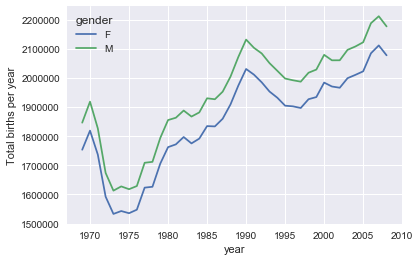

In [108]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()   #use seaborn style
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('Total births per year')

In [111]:
# Remove outliers:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births['day'] = births['day'].astype(int)

In [112]:
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day,
                              format='%Y%m%d')


In [113]:
births['DOW'] = births.index.dayofweek

Text(0,0.5,'mena births by day')

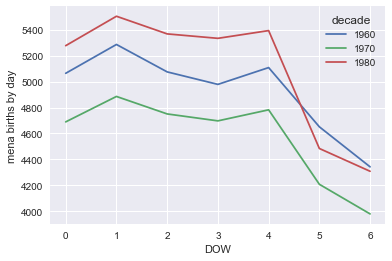

In [115]:
# Plot DOW
births.pivot_table('births', index='DOW', columns='decade', aggfunc='mean'). plot()
plt.ylabel('mena births by day')

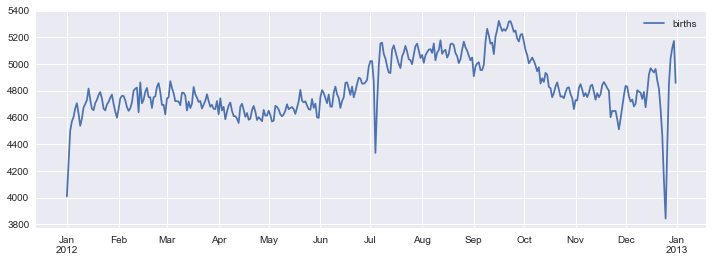

In [117]:
# births by day
births_by_day = births.pivot_table('births', index=[births.index.month, births.index.day])
births_by_day.index = [pd.datetime(2012, month, day) for (month, day) in births_by_day.index]
#plot the results
fix, ax = plt.subplots(figsize=(12, 4))
births_by_day.plot(ax=ax)

In [120]:
data = ['peterr', 'lotr', None, 'cot', 'sot']
names = pd.Series(data)
names.str.capitalize()

0    Peterr
1      Lotr
2      None
3       Cot
4       Sot
dtype: object

In [121]:
monte = pd.Series(['Gragham Chapman', 'Joahn Cleese', 'Terry Gilliam',
                   'Eraic Idle', 'Terry Joanes', 'Michael Palin'])

In [139]:
monte.str.len()
monte.str.lower()
monte.str.islower()
monte.str.find('T')
monte.str.isnumeric()
monte.str.isspace()
monte.str.istitle()

0    True
1    True
2    True
3    True
4    True
5    True
dtype: bool

In [141]:
try:
    monte.str.extract('[A-Za-z]+')
    monte.str.findall(r'^[^AEIOU].*[^aeiou]$')
except:
    pass

C:\Users\Lenovo\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


In [145]:
# Slicing and indexing of a string
monte.str[0:3]
monte.str.split().str.get(0)


0    Gragham
1       John
2      Terry
3       Eric
4      Terry
5    Michael
dtype: object

In [148]:
# Divide column into dummy columns
full_monte = pd.DataFrame({'info': ['B|C|D', 'B|C', 'B|D', 'B|C|D', 'B|C', 'B|D'],
                           'name': monte})
full_monte['info'].str.get_dummies('|')

,B,C,D
0,1,1,1
1,1,1,0
2,1,0,1
3,1,1,1
4,1,1,0
5,1,0,1


In [152]:
try:
    recipes = pd.read_json(dir + 'recipeitems-latest.json')
except ValueError as e:
    print('Value Error: ', e)

Value Error:  Could not reserve memory block


In [151]:
with open(dir + 'recipeitems-latest.json') as f:
    line = f.readline()
pd.read_json(line).shape

(2, 12)

In [155]:
# read the entire file into a Python array
with open(dir + 'recipeitems-latest.json', 'r', encoding="utf8") as f:
    #extract each line
    data = (line.strip() for line in f)
    # Reformat so each line is element of  alist
    data_json = '[{0}]'.format(','.join(data))
#read the results as json
recipes = pd.read_json(data_json)


MemoryError: 

In [160]:
# Date and Time in Pandas
date = pd.to_datetime('4th of July, 2015')
date.strftime('%A, %dth')

'Saturday, 04th'

In [168]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

In [169]:
# building an index for Panda Series
index = pd.DatetimeIndex(['2014-07-01', '2014-07-02',
                          '2015-07-01', '2017-07-02'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-01    0
2014-07-02    1
2015-07-01    2
2017-07-02    3
dtype: int64

In [171]:
data['2014-07-02':'2015-07-01']
data['2015']


2015-07-01    2
dtype: int64

In [176]:
from datetime import datetime

In [177]:
#convert different dates to datetype object
dates = pd.to_datetime([datetime(2015, 7, 3), '4th July 2015', '2015-Jul-6', 
                        '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [178]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [180]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [187]:
# how to create list 
pd.date_range('2015-01-12', '2015-01-31')
pd.date_range('2015-01-01', periods=10)
pd.date_range('2015-01-01', periods=8, freq='H')
pd.period_range('2015-01', periods=12, freq='M')
pd.timedelta_range(0, periods=24, freq='H')
pd.date_range('2015-01-01', periods=14, freq='B')

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12',
               '2015-01-13', '2015-01-14', '2015-01-15', '2015-01-16',
               '2015-01-19', '2015-01-20'],
              dtype='datetime64[ns]', freq='B')

In [189]:
from pandas_datareader import data
goog = data.DataReader('GOOG', start='2004', end='2016', data_source='yahoo')
goog.head()

ImmediateDeprecationError: 
Yahoo Daily has been immediately deprecated due to large breaks in the API without the
introduction of a stable replacement. Pull Requests to re-enable these data
connectors are welcome.

See https://github.com/pydata/pandas-datareader/issues


In [197]:
data = pd.read_csv(dir + 'Bicycle.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


In [198]:
data.columns = ['West', 'East']
data['Total'] = data.eval('West + East')
data.dropna().describe()

,West,East,Total
count,48136.000000,48136.000000,48136.000000
mean,54.569179,55.049422,109.618601
std,72.980790,79.668609,138.591455
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,29.000000,28.000000,59.000000
75%,71.000000,67.000000,143.000000
max,854.000000,717.000000,1165.000000


Text(0,0.5,'Hourly Bicycle Count')

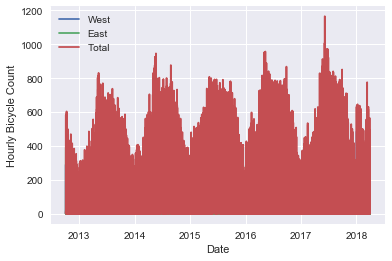

In [200]:
data.plot()
plt.ylabel('Hourly Bicycle Count')

Text(0,0.5,'Weekly Bicycle Count')

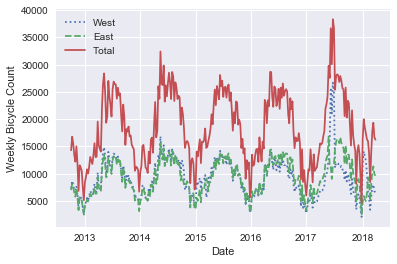

In [202]:
# The data is too dense, it's better to resample it
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly Bicycle Count')

C:\Users\Lenovo\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.resample() is now a deferred operation
You called rolling(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  


Text(0,0.5,'Mean hourly count')

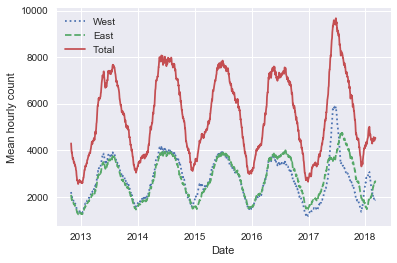

In [209]:
daily = data.resample('D')
daily.rolling(50, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('Mean hourly count')

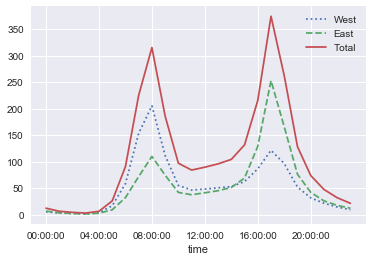

In [211]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', "--", "-"])

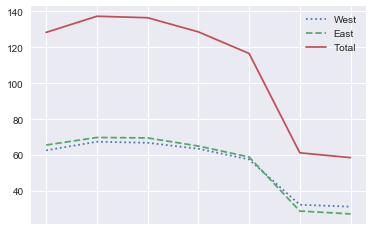

In [212]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-'])

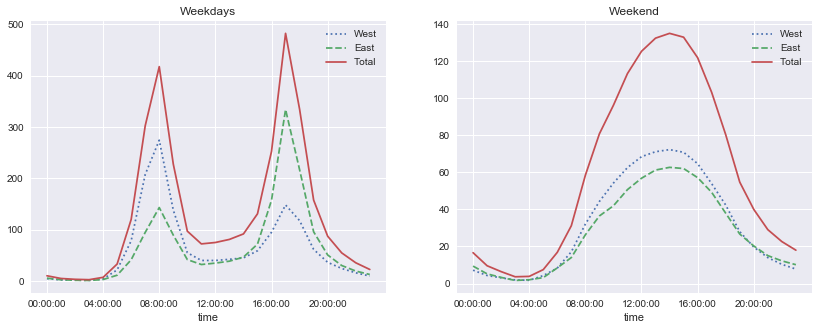

In [215]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()
fix, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays', 
                           xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekend',
                           xticks=hourly_ticks, style=[':', '--', '-'])